In [33]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.constrained_layout.use'] = True

In [2]:
# load data
df = pd.read_csv("../../data/random_samples/stratified_sampling_clean_text_data_by_price_whigh_sz50000_1619835594.csv")

In [3]:
df.head(2)

,train_id,clean_item_description,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,...,item_name_after_avg_word_len,item_condition_id,category_name,brand_name,shipping,price,c1,c2,c3,price_bin
0,806824,new tags,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,...,5.25,1,Women/Athletic Apparel/Shirts & Tops,Nike,1,15.0,women,athletic apparel,shirts & tops,"(10, 15]"
1,772820,nastasya every hills lipstick fashion,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,...,10.00,1,Beauty/Makeup/Lips,Anastasia Beverly Hills,0,22.0,beauty,makeup,lips,"(20, 25]"


In [4]:
df.shape

(50000, 34)

## Vectorize the Pre-processed Item_Description column using tfidf
- purpose: to quantifies the importance of a particular word relative to the a collection of documents

$$tfidf = tf(w) * idf(w)$$

where:

$$tf(w) = \frac{(number  \,\, of   \,\,times  \,\,the \,\, word  \,\,appears  \,\,in  \,\,the  \,\,document)}{(Total \,\,number\,\, of \,\,words \,\,in \,\,the \,\,document)}$$


$$idf(w) = log(\frac{Number \,\,of\,\,documents}{ number \,\,of \,\,documents \,\,that \,\,contain \,\,word \,\, w})$$







TF (Term Frequency) =  measure how frequently a term occurs in a document

IDF (Inverse DOcument Frequency) = measure how important a term is. Less important words have lower IDF values

Tfidfvectorizer systematically compute word counts, then compute the Inverse Document Frequency and then compute the TFIDF score

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer(analyzer = "word",
                             max_features=10000,
                             ngram_range = (1,2)
                             )

In [7]:
vz = vectorizer.fit_transform(df['clean_item_description'].values).toarray()
vz.shape

(50000, 10000)

the rows of the vz matrix is the total records of item_description,

the column of the vz matrix is the features

In [8]:
feature_names = vectorizer.get_feature_names()

In [9]:
# make a df out of the vectorized text
ndf = pd.DataFrame(vz, columns = feature_names)

In [10]:
ndf.head()

,00,007,01,02,03,03 months,04,05,06,07,...,zip front,zip hood,zip jacket,zip plover,zip pocket,zip pockets,zip size,zip sweatshirt,zip top,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
ndf.shape

(50000, 10000)

In [11]:
# create a dictionary for each feature and its tfidf values
dictionary = dict(zip(feature_names, vectorizer.idf_))

In [12]:
feature_dict = pd.DataFrame.from_dict(dictionary,orient='index', columns= ['tfidf_score'])

In [13]:
feature_dict.sort_values(by = 'tfidf_score',ascending = False, inplace = True)

In [14]:
len(dictionary.keys())

10000

Visualize the top 10 features with the highest idf weights
- The higher the numerical weight value, the rarer the term
- The idf of a rare term is high, whereas the idf of a frequent term is likely to be low


In [15]:
feature_dict['tfidf_score'][:10]

per sheet        10.721186
bolster pack     10.028039
ti canon         10.028039
cameo             9.873888
lululemon top     9.873888
saxophone         9.873888
mcstuffins        9.873888
part not          9.873888
do mcstuffins     9.873888
clara             9.873888
Name: tfidf_score, dtype: float64

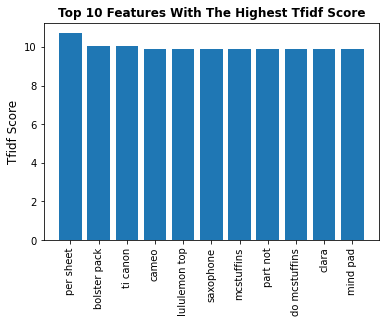

In [16]:
plt.bar(height = feature_dict['tfidf_score'][:11].values, x = feature_dict.index[:11])

plt.title("top 10 features with the highest tfidf score".title(), fontweight= 'bold')

plt.xticks(rotation=90);

plt.ylabel("tfidf score".title(), fontsize = 12);

plt.show()

## Just use the top SpectralEmbedding + TSNE

In [46]:
from sklearn.manifold import SpectralEmbedding

In [ ]:
random_state = 32

# instantiate
embedding = SpectralEmbedding(n_components=2, random_state =random_state )

# fit and transform
se_df = embedding.fit_transform(ndf)


## pca + tsne

In [17]:
os.chdir("/Users/zhiying/OneDrive - The City College of New York/DSE I2100 Applied ML and Data Mining/project/project-product-price-prediction")

In [18]:
from final.dimension_reduction.feature_reduction import dimension_reduction

In [19]:
pca_df = pca_df = dimension_reduction(ndf, "PCA", 10)

In [20]:
pca_df.shape

(50000, 10)

In [23]:
from sklearn.manifold import TSNE

random_state = 32

# instantiate
tsne = TSNE(n_components = 2, random_state = random_state, verbose=1,n_iter=250 )

# fit on data
tsne_tfidf = tsne.fit_transform(pca_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.090s...
[t-SNE] Computed neighbors for 50000 samples in 16.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

In [28]:
tsne_tfidf.shape

(50000, 2)

In [26]:
vis_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])

In [30]:
vis_df['category'] = df['c1']
vis_df['price'] = df['price_bin']

In [31]:
vis_df

,x,y,category,price
0,-0.425721,6.173898,women,"(10, 15]"
1,-2.557305,2.344193,beauty,"(20, 25]"
2,-3.779515,-2.654243,women,"(50, 60]"
3,3.309898,0.283946,women,"(80, 90]"
4,-2.054763,-3.021299,women,"(50, 60]"
...,...,...,...,...
49995,-0.409689,1.255798,women,"(500, 2500]"
49996,-2.041433,-1.410841,women,"(200, 500]"
49997,-0.613102,0.719745,beauty,"(30, 40]"
49998,1.873768,-0.005333,women,"(15, 20]"


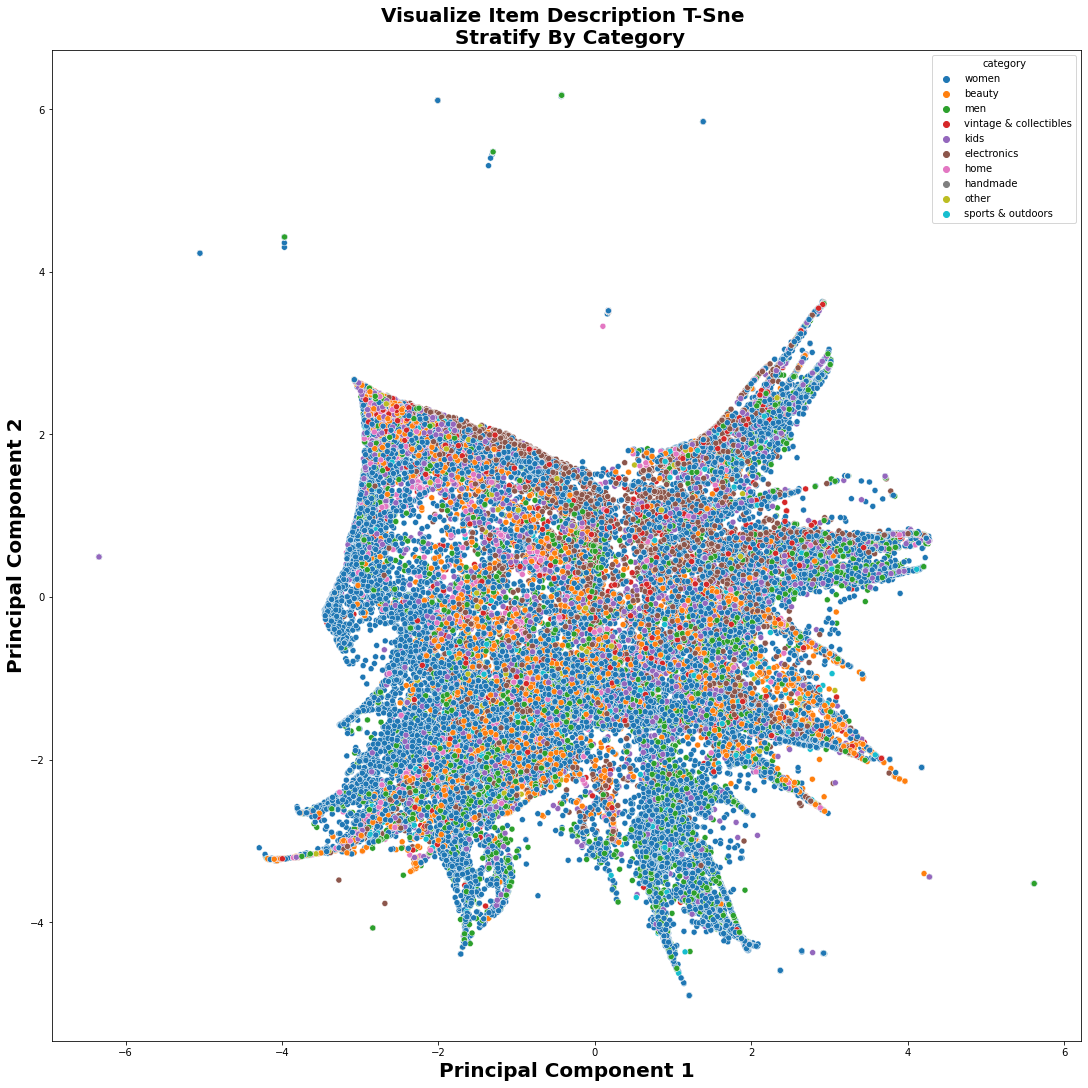

In [44]:

sns.scatterplot(data=vis_df, x='x', y='y', hue='category')

plt.title("Visualize Item description t-SNE \n stratify by category".title(), fontweight = "bold", fontsize = 20)

plt.xlabel("principal component 1".title(), fontweight = "bold", fontsize = 20)

plt.ylabel("principal component 2".title(), fontweight = "bold", fontsize = 20)

plt.show()

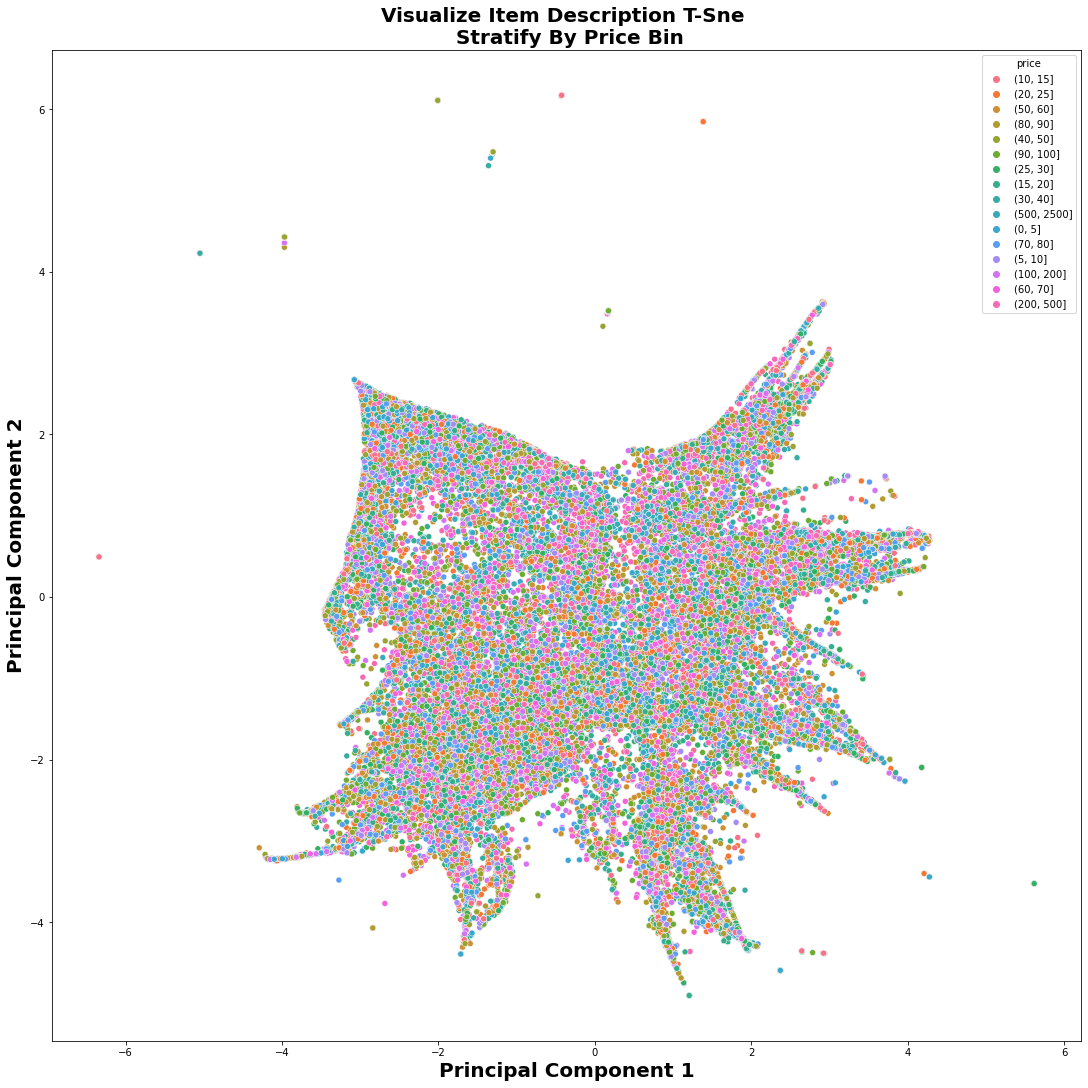

In [43]:

sns.scatterplot(data=vis_df, x='x', y='y', hue='price')

plt.title("Visualize Item description t-SNE \n stratify by price bin".title(), fontweight = "bold", fontsize = 20)

plt.xlabel("principal component 1".title(), fontweight = "bold", fontsize = 20)

plt.ylabel("principal component 2".title(), fontweight = "bold", fontsize = 20)

plt.show()